# More `astroplan` - Constraints

In [38]:
import numpy as np
import pandas as pd

import pytz

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
from astroplan import Observer, FixedTarget

import warnings
warnings.filterwarnings('ignore', category=Warning)

----

# Side Topic One: `For-loop` and `arrays`

In [39]:
my_matrix = np.array(
[[0, 3, 7],
 [2, 1, 8],
 [4, 9, 3],]
)

my_matrix

array([[0, 3, 7],
       [2, 1, 8],
       [4, 9, 3]])

In [40]:
for my_x, my_y, my_z in my_matrix:
    print(f"X = {my_x}, Y = {my_y}, and Z = {my_z}")

X = 0, Y = 3, and Z = 7
X = 2, Y = 1, and Z = 8
X = 4, Y = 9, and Z = 3


---

<img style="float: right;" src="./images/ComplexCode.jpg" width="275"/>

# Side Topic Two: List Comprehensions

List comprehensions provide a concise way to create lists (arrays). Common applications are to make new lists where each element is the result of some operations applied to each member of another sequence.

### For example: Create the list: `[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]`

In [41]:
squares = []                    # create a blank list

for x in range(10):             # foor loop 0 -> 9
    squares.append(x**2)        # calculate x**2 for each x, add to end of list

squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### You can do the same thing with:

In [42]:
squares = [x**2 for x in range(10)]

squares

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

### You can include `if` statements:

In [43]:
even_squares = []

for x in range(10):

    if (x % 2 == 0):
        even_squares.append(x**2)

even_squares

[0, 4, 16, 36, 64]

### You can do the same thing with:

In [44]:
even_squares = [x**2 for x in range(10) if (x % 2 == 0)]

even_squares

[0, 4, 16, 36, 64]

----

<img style="float: right;" src="./images/Both.gif" width="225"/>

# Side Topic Three: 

* ## `For-loop - arrays`
* ## List Comprehensions


In [45]:
my_matrix

array([[0, 3, 7],
       [2, 1, 8],
       [4, 9, 3]])

In [46]:
def my_function(my_x, my_y, my_z):
    result = my_x + my_y + my_z
    return result

In [47]:
my_output = [my_function(my_x, my_y, my_z) for my_x, my_y, my_z in my_matrix]

In [48]:
my_output

[10, 11, 16]

---

# Now to observations

## Let us start with a external list of target objects:

In [49]:
target_table = pd.read_csv('./Data/ObjectList.csv')

In [50]:
target_table[0:3]

,Name,RA,DEC
0,Aquarius,22.40784,-10.15606
1,Aries,2.66237,19.95906
2,Cancer,8.68322,19.18940


#### Shortcut to pull all values from a `pandas` table:

In [51]:
table_values = target_table.to_numpy()

In [52]:
table_values[0:3]

array([['Aquarius', 22.40784, -10.15606],
       ['Aries', 2.66237, 19.95906],
       ['Cancer', 8.68322, 19.1894]], dtype=object)

### Instead of using SIMBAD, you can manually enter info for a target in the sky

`FixedTarget(coords, name = 'string')`

In [53]:
targets = [FixedTarget(coord = SkyCoord(ra = my_RA * u.hourangle, dec = my_DEC * u.deg), name = my_Name)
           for my_Name, my_RA, my_DEC in table_values]

In [54]:
targets[0:3]

[<FixedTarget "Aquarius" at SkyCoord (ICRS): (ra, dec) in deg (336.1176, -10.15606)>,
 <FixedTarget "Aries" at SkyCoord (ICRS): (ra, dec) in deg (39.93555, 19.95906)>,
 <FixedTarget "Cancer" at SkyCoord (ICRS): (ra, dec) in deg (130.2483, 19.1894)>]

----

# [Theodor Jacobsen Observatory (TJO)](http://depts.washington.edu/astron/outreach/jacobsen-observatory/)

The UW Astronomy department was founded in 1891 by the mathematics professor Joseph M. Taylor. Dr. Taylor built the first observatory on the University of Washington campus (UW was originally located downtown - 4th Ave and University, the current location of the Fairmont Olympic Hotel).
When the university moved to its present location, Dr. Taylor spent 3,000 dollars on a 6-inch refractor telescope and appropriated the stone and money left over from the construction of Denny Hall to build the observatory we see on campus today.

The observatory is named after Theodor S. Jacobsen, who began teaching at UW in 1928. Professor Jacobsen had a long career at the UW and was the key figure in establishing the modern UW Astronomy department. His last book came out in 1999, four years before his death at the age of 102.

<p align="center"> 
    <img src="./images/TJO_Now_sm.jpg" width = "291">
    <img src="./images/TJO_Telescope.jpg" width = "176">
    <img src="./images/TJ_Photo.jpg" width = "243">
    <img src="./images/OldUW.jpg" width = "320">
</p>

In [55]:
tjo_observe = Observer(longitude = -122.309268 * u.deg,
                       latitude = 47.660431 * u.deg,
                       timezone = 'US/Pacific',
                       name = "Theodor Jacobsen Observatory"
                      )

In [56]:
tjo_observe

<Observer: name='Theodor Jacobsen Observatory',
    location (lon, lat, el)=(-122.30926800000003 deg, 47.66043100000001 deg, 0.0 m),
    timezone=<DstTzInfo 'US/Pacific' LMT-1 day, 16:07:00 STD>>

----

# Public Outreach

TJO's main use today is as a site for public outreach. In normal times, undergraduate astro majors (you!) give monthly public talks and lead tours of the night sky

For this example, let us say you are planning to give a talk at TJO about the constellations of the zodiac. And you want to be able to show the audience some of the constellations in the sky.

* The date of the talk is Mar 29, 2021
* The talks are usually given from 8 - 11 pm

In [57]:
talk_start = Time("2021-03-29 04:00")
talk_end = Time("2021-03-29 07:00")

print(talk_start.to_datetime(tjo_observe.timezone))

2021-03-28 21:00:00-07:00


In [58]:
my_time_range = [talk_start, talk_end]

----

# Observing Constraints

### We have a place, a time, and some targets. But what targets can we see?

In [59]:
from astroplan import SunSeparationConstraint
from astroplan import observability_table

### We are observing at night, so let us only look at things thar are greater than 6 hours away from the Sun

In [60]:
my_constraints = [SunSeparationConstraint(6 * u.hourangle)]

In [61]:
my_constraints

## astroplan's `observability_table` is a quick summary of what you can see

`observability_table(constraints, location, targets, time_range)`

In [62]:
observing_table = observability_table(my_constraints, tjo_observe, targets, time_range = my_time_range)

observing_table

target name,ever observable,always observable,fraction of time observable
str11,bool,bool,float64
Aquarius,False,False,0.0
Aries,False,False,0.0
Cancer,True,True,1.0
Capricornus,False,False,0.0
Gemini,True,True,1.0
Leo,True,True,1.0
Libra,True,True,1.0
Ophiuchus,True,True,1.0
Pisces,False,False,0.0


### Just show the objects that are observable

In [63]:
observing_table[observing_table['ever observable'] > 0]

target name,ever observable,always observable,fraction of time observable
str11,bool,bool,float64
Cancer,True,True,1.0
Gemini,True,True,1.0
Leo,True,True,1.0
Libra,True,True,1.0
Ophiuchus,True,True,1.0
Scorpius,True,True,1.0
Virgo,True,True,1.0


## What about Moonlight?

In [64]:
tjo_observe.moon_illumination(talk_start)

0.9964234331363064

In [65]:
from astroplan import MoonSeparationConstraint

In [66]:
my_constraints.append(MoonSeparationConstraint(30 * u.deg))

In [67]:
my_constraints

In [68]:
observing_table = observability_table(my_constraints, tjo_observe, targets, time_range = my_time_range)

In [69]:
observing_table[observing_table['ever observable'] > 0]

target name,ever observable,always observable,fraction of time observable
str11,bool,bool,float64
Cancer,True,True,1.0
Gemini,True,True,1.0
Leo,True,True,1.0
Libra,True,True,1.0
Ophiuchus,True,True,1.0
Scorpius,True,True,1.0


---

<img style="float: right;" src="./images/TJO_Locate.PNG" width="300"/>

# Site Specific Constraints

## TJO is not exactly in the greatest location for astronomical observations!

* Lots of city lights
* Especially the adjacent parking lot
* Surrounding trees really limit the view!
* You have to look above Alt = 30 degrees to clear the trees

In [70]:
from astroplan import AltitudeConstraint

In [71]:
my_constraints.append(AltitudeConstraint(min=30*u.deg, max=None))

In [72]:
observing_table = observability_table(my_constraints, tjo_observe, targets, time_range = my_time_range)

In [73]:
observing_table[observing_table['ever observable'] > 0]

target name,ever observable,always observable,fraction of time observable
str11,bool,bool,float64
Cancer,True,True,1.0
Gemini,True,True,1.0
Leo,True,True,1.0


In [74]:
total_time = (talk_end - talk_start).to(u.h)

total_time

<Quantity 3. h>

In [75]:
observing_table['Observing Time'] = total_time * observing_table['fraction of time observable']

In [76]:
observing_table[observing_table['ever observable'] > 0]

target name,ever observable,always observable,fraction of time observable,Observing Time
,,,,h
str11,bool,bool,float64,float64
Cancer,True,True,1.0,3.0
Gemini,True,True,1.0,3.0
Leo,True,True,1.0,3.0


----

<img style="float: right;" src="./images/TJO_Locate_AZ.PNG" width="300"/>

# Non-Standard Constraint

## In addition, the trees to the North and West completely envelop the observatory!

* You can only really observe at Azimuths between about 70 and 185 degrees
* `astroplan` does not have an Azimuth constraint so will will try something else

## We will use `plot_sky` to check the azimuth constraint

* `plot_sky(targets, location, time)`

In [77]:
target_mask = np.flatnonzero(observing_table['ever observable'] > 0)

In [78]:
target_mask

array([2, 4, 5])

In [79]:
for index in target_mask:
    print(targets[index])

<FixedTarget "Cancer" at SkyCoord (ICRS): (ra, dec) in deg (130.2483, 19.1894)>
<FixedTarget "Gemini" at SkyCoord (ICRS): (ra, dec) in deg (107.33775, 23.25312)>
<FixedTarget "Leo" at SkyCoord (ICRS): (ra, dec) in deg (160.3995, 14.78016)>


In [87]:
import matplotlib.pyplot as plt

from astroplan import time_grid_from_range
from astroplan.plots import plot_sky

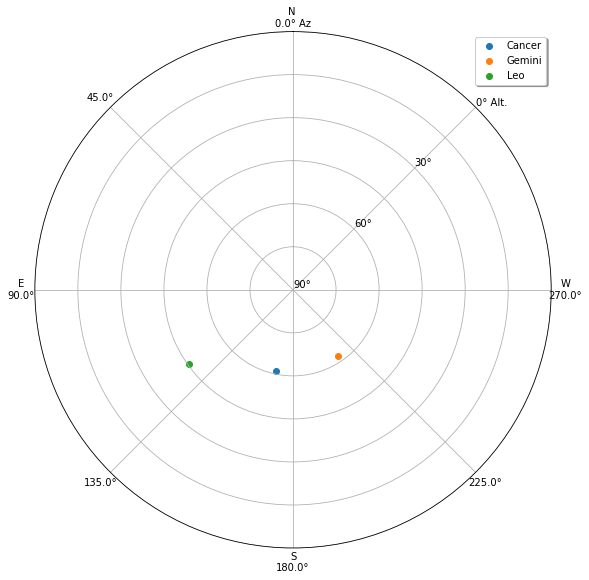

In [88]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': 'polar'})
fig.set_size_inches(8,8)

fig.tight_layout()

for index in target_mask:
    ax = plot_sky(targets[index], tjo_observe, talk_start)

ax.legend(loc=0,shadow=True);

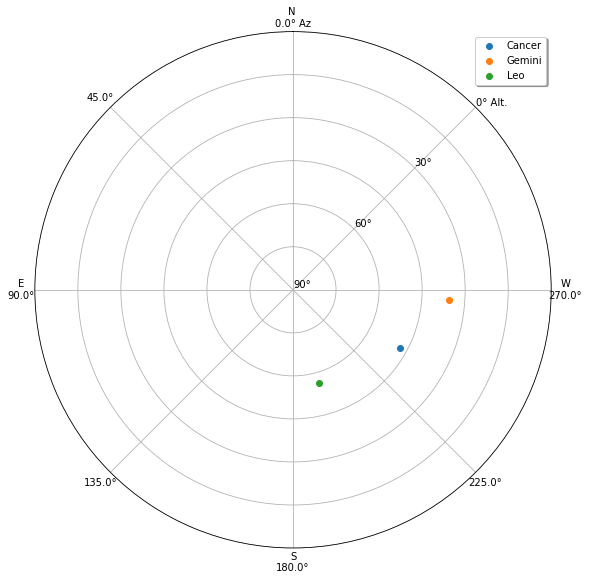

In [90]:
fig,ax = plt.subplots(1,1, subplot_kw={'projection': 'polar'})
fig.set_size_inches(8,8)

fig.tight_layout()

for index in target_mask:
    ax = plot_sky(targets[index], tjo_observe, talk_end)

ax.legend(loc=0,shadow=True);

## Looks like we are going to talk about Leo!

----

# Astroplan Constraints

`from astroplan import CONSTRAINT`

* `AirmassConstraint(max)` - Constrain the airmass of a target.
* `AltitudeConstraint(min, max)` - Constrain the altitude of the target.
* `MoonIlluminationConstraint(min, max)` - Constrain the fractional illumination of the Moon.
* `MoonSeparationConstraint(min, max)` - Constrain the separation between the Moon and some targets.
* `SunSeparationConstraint(min, max)` - Constrain the separation between the Sun and some targets.

---

# Moving Targets (solar system targets)

- The built-in solar system objects are: 'sun', 'mercury', 'venus', 'earth-moon-barycenter', 'earth', 'moon', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto'

In [91]:
from astropy.coordinates import get_body

In [92]:
sun_now = get_body('sun',talk_start)

sun_now

<SkyCoord (GCRS: obstime=2021-03-29 04:00:00.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (7.7103817, 3.32855399, 0.99835821)>

In [93]:
sun_location = tjo_observe.altaz(talk_start, sun_now)

sun_location.alt, sun_location.az

(<Latitude -14.80451986 deg>, <Longitude 292.47387015 deg>)

In [94]:
moon_now = get_body('moon',talk_start)

In [95]:
moon_location = tjo_observe.altaz(talk_start, moon_now)

moon_location.alt, moon_location.az

(<Latitude 11.07759911 deg>, <Longitude 105.98554572 deg>)

In [96]:
sun_now.separation(moon_now)

<Angle 173.1262823 deg>

## We can make the Moon a `FixedTarget` for planning

In [97]:
pseudo_moon = FixedTarget(moon_now, name = "Moon")

In [98]:
pseudo_moon

<FixedTarget "Moon" at SkyCoord (GCRS: obstime=2021-03-29 04:00:00.000, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, km) (194.32194006, -1.42733025, 361330.35454776)>

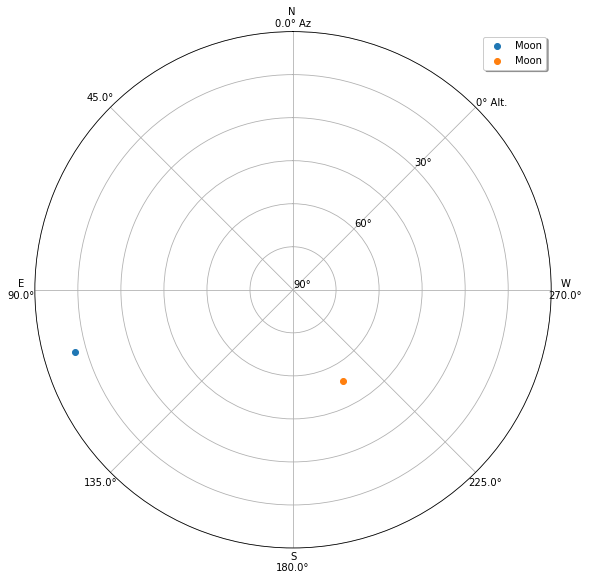

In [100]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': 'polar'})
fig.set_size_inches(8,8)

fig.tight_layout()

ax = plot_sky(pseudo_moon, tjo_observe, talk_start)
ax = plot_sky(pseudo_moon, tjo_observe, talk_end)

ax.legend(loc=0,shadow=True);

## Maybe we should talk about the Moon!